In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-handwritten-digits/train_labels.npy
/kaggle/input/mnist-handwritten-digits/test_labels.npy
/kaggle/input/mnist-handwritten-digits/train_images.npy
/kaggle/input/mnist-handwritten-digits/readme.md
/kaggle/input/mnist-handwritten-digits/test_images.npy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
train_val_images = 'train_images.npy' # Train 80%, Validation 20%
train_val_labels = 'train_labels.npy' # Train 80%, Validation 20%
test_images = 'test_images.npy'
test_labels = 'test_labels.npy'

train_val_images = np.load(os.path.join(dirname, train_val_images))
train_val_labels = np.load(os.path.join(dirname, train_val_labels))

# 90% of the training data for training, 10% for validation
train_images = train_val_images[:int(train_val_images.shape[0] * 0.9)]
train_labels = train_val_labels[:int(train_val_labels.shape[0] * 0.9)]

val_images = train_val_images[int(train_val_images.shape[0] * 0.9):]
val_labels = train_val_labels[int(train_val_labels.shape[0] * 0.9):]

test_images = np.load(os.path.join(dirname, test_images))
test_labels = np.load(os.path.join(dirname, test_labels))

In [3]:
def show_data(idx, images, labels, preds=None):
    print('label :', labels[idx])
    if preds is not None:
        print('prediction :', preds[idx])
        
    plt.imshow(images[idx], cmap='Greys')
    plt.colorbar(label='Value')
    plt.title(f'Gambar')
    plt.show()
    


label : 5


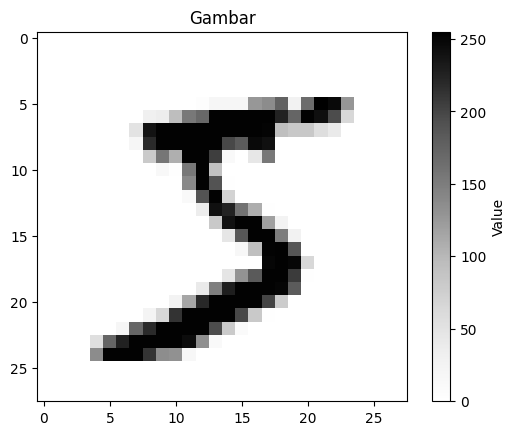

In [4]:
show_data(0, train_images, train_labels, preds=None)

# Data Preprocessing

In [5]:
# train_images[0]
# train_labels[0]

In [6]:
# 1a) Pastikan data jadi Hitam Putih - done

# 1b) normalize nilai x
max_x = train_images.max()
train_images = train_images/ max_x

# 2) Rubah matrix jadi vector
n_rows = train_images.shape[1]
n_columns = train_images.shape[2]
train_images_vect = np.reshape(train_images, newshape=(-1, n_rows*n_columns))



# 3) One Hot Encoding Label

n_class = np.unique(train_labels).shape[0]

def label_to_one_hot(n_class=10, train_labels=[]):
    one_hot_unique = np.eye(n_class+1)
    res = one_hot_unique[train_labels]
    return res

# vect_one_hot = {
#     0: [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     1: [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     2: [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
# }

train_labels_onehot = label_to_one_hot(10, train_labels)
test_labels_onehot = label_to_one_hot(10, test_labels)
val_labels_onehot = label_to_one_hot(10, val_labels)


In [7]:
train_images_vect.shape

(54000, 784)

In [8]:
train_images_vect[0].shape
train_images[0].shape

(28, 28)

# Modelling

In [9]:
# Initializer
def initializer(size, low=0., high=0.2):
    weight = np.random.uniform(low=low, high=high, size=size) 
    return weight

# w = initializer(size=(10, 64))

In [10]:
# Relu
## Relu(X) = MAX(0, X)
def Relu(x, axis=1):
    res = np.maximum(0, x)
    return res

# w = initializer(size=(5, 10), low = -0.1)
# Relu(w)

In [11]:
# Relu Derivative
def Relu_derivative(x):
    res = np.where(x > 0, 1, 0)
    return res

# Relu_derivative(w)

In [12]:
# Softmax

# Softmax(x) = e^xi / sum(e^x)
def softmax(x, axis=1):
    x_exp = np.exp(x)
    x_exp_sum = np.sum(x_exp, axis=axis)[:, np.newaxis]
    return x_exp / x_exp_sum 

# softmax(w, axis=-1)[1].sum()

### Gradient dan Loss
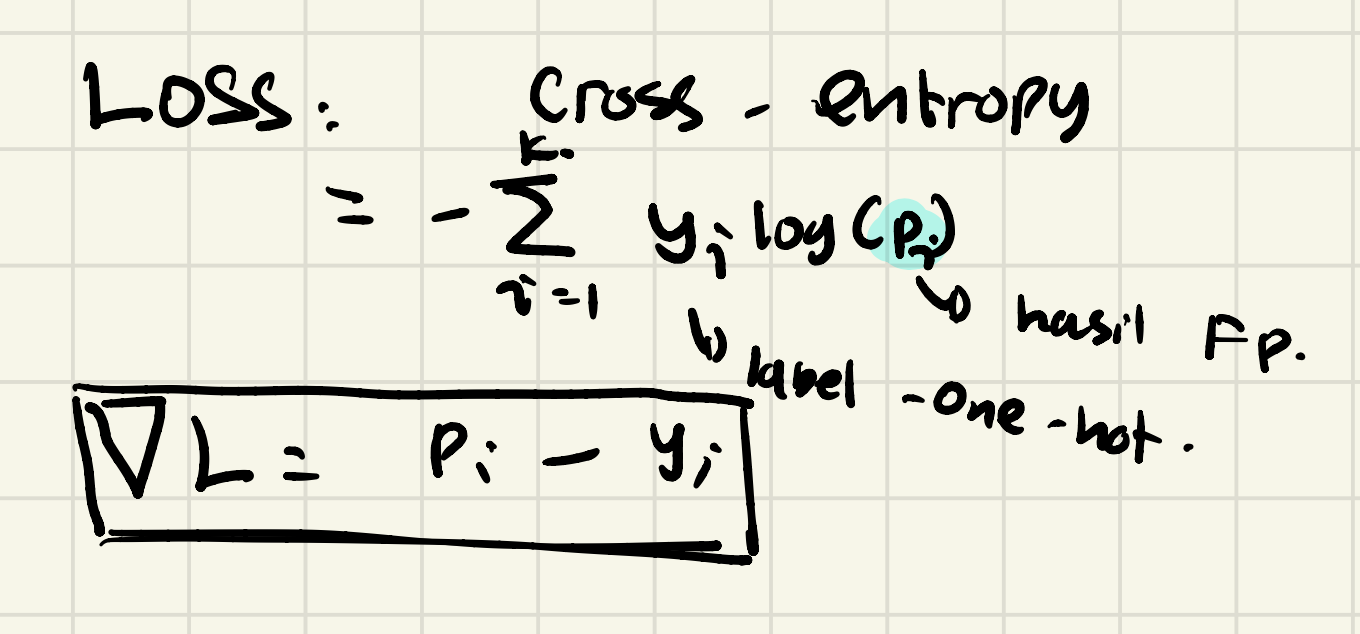

In [13]:
# Compute Gradient
def compute_gradient(y_pred, y_true):
    n_data = y_true.shape[0]
    gradient = (y_pred - y_true)/n_data # one_hot_encoding
    return gradient

def apply_gradient(nn, eta, dWb):
    for i in nn:
        nn[i]['W'] = nn[i]['W'] - (eta * dWb[i]['W'])
        nn[i]['b'] = nn[i]['b'] - (eta * dWb[i]['b'])
    
    return nn

In [14]:
# Compute NLL

def compute_NLL(y_pred, y_true):
    y_pred_log = np.log(y_pred)
    ll = y_true * y_pred_log
    nll = np.mean(ll) * -1
    
    return nll

## Build NN Architecture

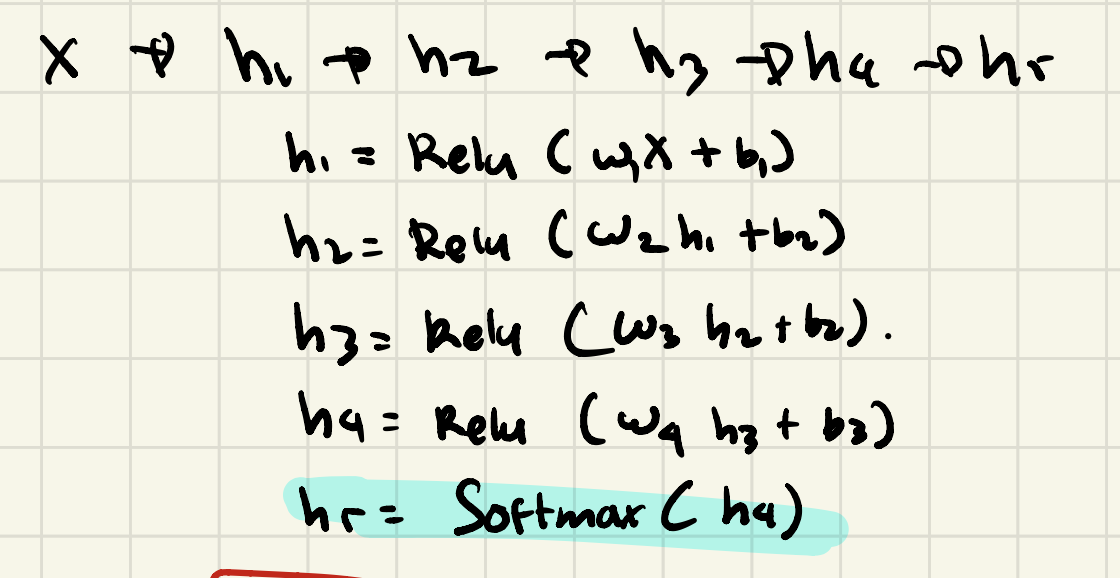

In [15]:
# train_images_vect.shape

x_batch = train_images_vect[: 20]
y_batch = train_labels[: 20]


In [16]:
# Build NN


def build_nn(config_nn, x_batch):
    nn = {}
    n_features = x_batch.shape[1]
    
    # Input Layer
    # W: batch_size, w=64
    
    for i, h in enumerate(config_nn):
        if i == 0:
            input_size = x_batch.shape[1]
        else:
            input_size = config_nn[i-1]
        nn[i] = {
            'W': initializer(size=(input_size, h)),
            'b': initializer(size=(h)),
        }
    return nn

In [17]:
def forward_prop(nn, x_batch):
    h = {}
    n_layers = len(nn)
    for i in nn:
        # print(i)
        if i == 0:
            # input layer
            h[i] = Relu((x_batch @ nn[i]['W']) + nn[i]['b'])
        elif i < (n_layers-1):
            # hidden layers
            h[i] = Relu((h[i-1] @ nn[i]['W']) + nn[i]['b'])
        else:
            # output layer
            h[i] = softmax(h[i-1] @ nn[i]['W'] + nn[i]['b'], axis=1)
    return h

In [18]:
# Backward Propagation

def back_prop(nn, h, x_batch, y_batch_onehot):
    dH = {}
    dWb = {}

    n_layers = len(nn)
    
    dH[n_layers-1] = compute_gradient(h[n_layers-1], y_batch_onehot) * Relu_derivative(h[n_layers-1])
    
    for idx in range(n_layers-1, -1, -1):
        # compute dH
        if idx < n_layers-1:
            dH[idx] = (dH[idx+1] @ nn[idx+1]['W'].T) * Relu_derivative(h[idx])
    
        # compute dW & db
        if idx > 0:
            dWb[idx] = {
                'W': h[idx-1].T @ dH[idx],
                'b': np.mean(dH[idx], axis=0),
            }
        else:
            dWb[idx] = {
                'W': x_batch.T @ dH[idx], # -> dim(dW) == dim(W)
                'b': np.mean(dH[idx], axis=0),
            }
    return dH, dWb


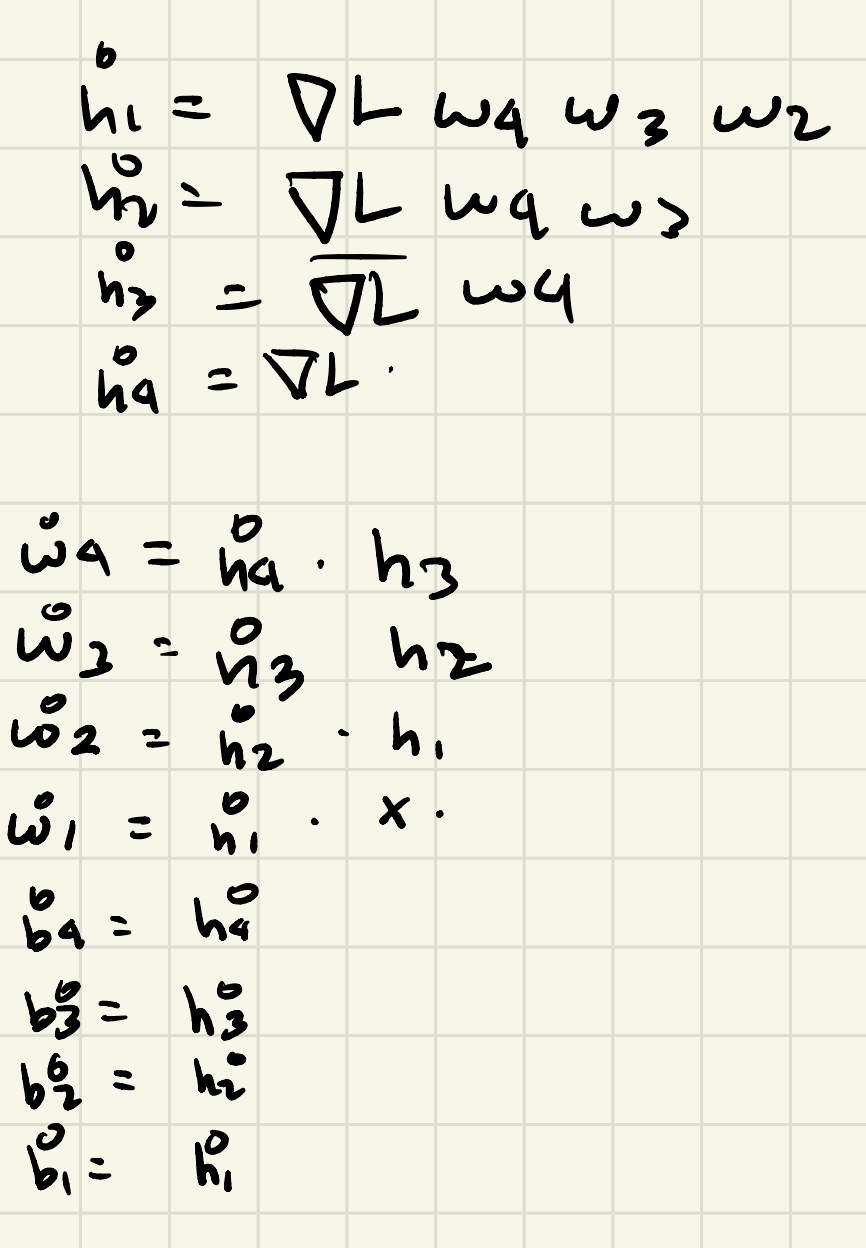

## Training Loop

In [19]:
n_epoch = 100
eta = 0.01

config_nn = [32, 16, 11]
nn = build_nn(config_nn, x_batch)

batch_size = 64

n_iters = (train_images_vect.shape[0]//batch_size) + 1

for epoch in range(n_epoch):
    for i in range(n_iters):
        

        x_batch = train_images_vect[i*batch_size: (i+1)*batch_size]
        y_batch_onehot = train_labels_onehot[i*batch_size: (i+1)*batch_size]
        y_batch = train_labels[i*batch_size: (i+1)*batch_size]
        
        h = forward_prop(nn, x_batch)
        dH, dWb = back_prop(nn, h, x_batch, y_batch_onehot)

        # update weights
        nn = apply_gradient(nn, eta, dWb)

        y_pred = h[len(config_nn)-1]

        nll = compute_NLL(y_pred, y_batch_onehot)

    print(f'epoch {epoch} - total iteration: {i} - nll: {nll}')

epoch 0 - total iteration: 843 - nll: 0.17255921323313567
epoch 1 - total iteration: 843 - nll: 0.11762021226605358
epoch 2 - total iteration: 843 - nll: 0.08133937732646557
epoch 3 - total iteration: 843 - nll: 0.0678353682119081
epoch 4 - total iteration: 843 - nll: 0.06103999266064295
epoch 5 - total iteration: 843 - nll: 0.05763112306982948
epoch 6 - total iteration: 843 - nll: 0.055411894695259645
epoch 7 - total iteration: 843 - nll: 0.052997804223544207
epoch 8 - total iteration: 843 - nll: 0.05168171603035725
epoch 9 - total iteration: 843 - nll: 0.05086984481238551
epoch 10 - total iteration: 843 - nll: 0.050287189902761556
epoch 11 - total iteration: 843 - nll: 0.05062808931508433
epoch 12 - total iteration: 843 - nll: 0.0501121149013315
epoch 13 - total iteration: 843 - nll: 0.04996260960344313
epoch 14 - total iteration: 843 - nll: 0.04970253628621321
epoch 15 - total iteration: 843 - nll: 0.04957742562247264
epoch 16 - total iteration: 843 - nll: 0.049649116022587016
epoch

In [20]:
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_batch

array([8, 8, 3, 4, 7, 0, 3, 0, 3, 7, 7, 2, 9, 4, 1, 2, 5, 6, 8, 5, 2, 5,
       4, 3, 9, 7, 5, 8, 1, 6, 0, 6, 2, 4, 7, 3, 4, 2, 4, 6, 5, 6, 0, 3,
       8, 8, 9, 8], dtype=uint8)

In [22]:
batch_size = 64
n_iters = (train_images_vect.shape[0]//batch_size) + 1


y_pred_list = []
# inference / model prediction
for i in range(n_iters):
    x_batch = train_images_vect[i*batch_size: (i+1)*batch_size]

    h = forward_prop(nn, x_batch)
    len_h = len(h)
    y_pred_one_batch = np.argmax(h[len_h-1], axis=1)
    y_pred_list.append(y_pred_one_batch)


In [23]:
y_pred_all = np.concatenate(y_pred_list)

label : 6
prediction : 6


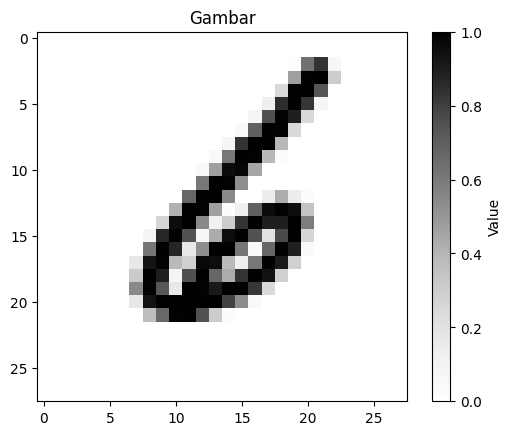

In [24]:
show_data(999, train_images, train_labels, preds=y_pred_all)

In [25]:
# akurasi = TP + TN / semua data
accuracy  = (y_pred_all == train_labels).sum()/ len(train_labels)
print(f'akurasi : {accuracy}')

akurasi : 0.9426481481481481


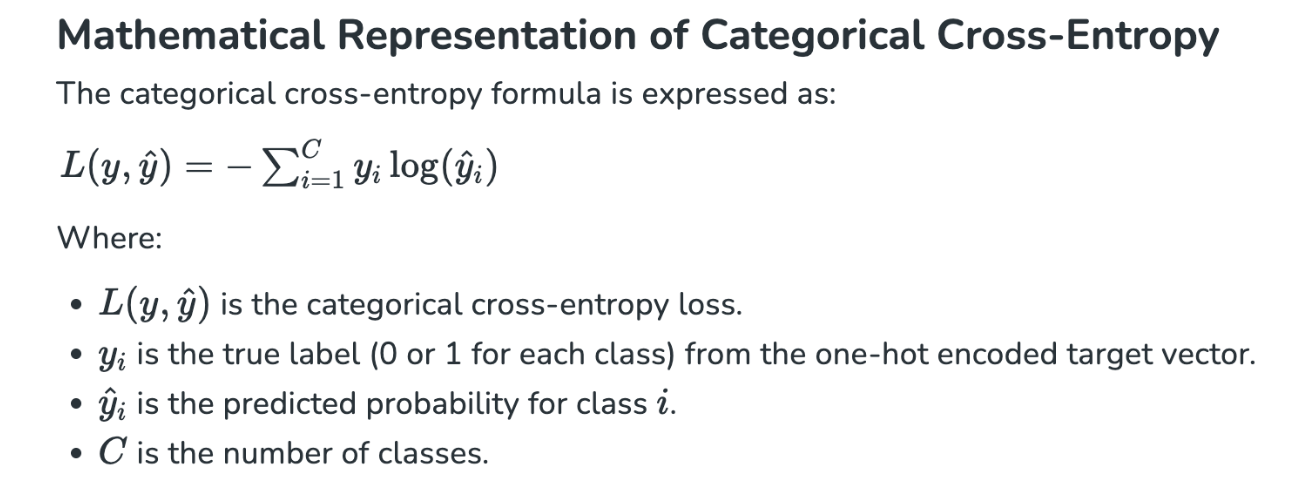
